# Redes Neuronales Convolucionales

In [1]:
from keras.models import Sequential
from tensorflow.keras import Input
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt
import numpy as np

## Crear la red

In [57]:
clasificador = Sequential()

In [58]:
clasificador.add(Input(shape = (64,64,3)))

In [68]:
clasificador.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 64, 64, 30)     │           840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 32, 32, 30)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 32, 32, 60)     │        16,260 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 16, 16, 60)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 15360)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │     1,966,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,983,437 (7.57 MB)

 Trainable params: 1,983,437 (7.57 MB)

 Non-trainable params: 0 (0.00 B)

In [60]:
clasificador.add(
    Conv2D(
        filters = 30,
        kernel_size = (3, 3),
        activation = "relu",
        padding = "same"
    )
)

In [61]:
clasificador.add(
    MaxPooling2D(pool_size = (2,2))
)

In [62]:
clasificador.add(
    Conv2D(
        filters = 60,
        kernel_size = (3, 3),
        activation = "relu",
        padding = "same"
    )
)

In [63]:
clasificador.add(
    MaxPooling2D(pool_size = (2,2))
)

In [64]:
clasificador.add(
    Flatten()
)

In [65]:
clasificador.add(
    Dense(
        units = 128,
        activation = "relu"
    )
)

In [66]:
clasificador.add(
    Dense(
        units = 1,
        activation = "sigmoid"
    )
)

In [67]:
clasificador.compile(
    optimizer = "adam",
    loss = "binary_crossentropy",
    metrics = ["accuracy"]
)

## Importar Imágenes

In [69]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [70]:
train_datagen = ImageDataGenerator(
    rescale = 1/255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
)

test_datagen = ImageDataGenerator(
    rescale = 1/255
)

In [72]:
training_set = train_datagen.flow_from_directory(
    "training_set",
    target_size = (64, 64),
    batch_size = 32,
    class_mode = "binary"
)

Found 8048 images belonging to 2 classes.


In [73]:
test_set = test_datagen.flow_from_directory(
    "test_set",
    target_size = (64, 64),
    batch_size = 32,
    class_mode = "binary"
)

Found 2000 images belonging to 2 classes.


In [74]:
images, labels = next(training_set)

In [76]:
next(training_set)

(array([[[[0.6722919 , 0.7190534 , 0.7543475 ],
          [0.68733823, 0.7340998 , 0.7693939 ],
          [0.6838816 , 0.75080353, 0.7568304 ],
          ...,
          [0.30446628, 0.29144347, 0.2803446 ],
          [0.38199157, 0.38199157, 0.37414843],
          [0.47058827, 0.47058827, 0.46274513]],
 
         [[0.68916124, 0.724292  , 0.75550115],
          [0.7021329 , 0.7372636 , 0.7684728 ],
          [0.6946915 , 0.7554432 , 0.7740739 ],
          ...,
          [0.32118043, 0.3081716 , 0.29707626],
          [0.37244943, 0.37244943, 0.3646063 ],
          [0.4692266 , 0.4692266 , 0.46138346]],
 
         [[0.5175806 , 0.5621526 , 0.6238751 ],
          [0.5246035 , 0.5691755 , 0.63089794],
          [0.53300196, 0.58749515, 0.66238683],
          ...,
          [0.32093543, 0.31452557, 0.30490595],
          [0.3730573 , 0.3796423 , 0.3994562 ],
          [0.4534967 , 0.4600817 , 0.4798956 ]],
 
         ...,
 
         [[0.30863413, 0.3489902 , 0.3385425 ],
          [0.39491

In [75]:
images[0].shape

(64, 64, 3)

In [18]:
images[0]

array([[[0.38884658, 0.25017905, 0.10696889],
        [0.37119898, 0.24482135, 0.12056401],
        [0.369519  , 0.2468041 , 0.12963982],
        ...,
        [0.17077707, 0.15116923, 0.13940452],
        [0.1666583 , 0.14705046, 0.13528575],
        [0.16151838, 0.14191054, 0.13014582]],

       [[0.40783468, 0.27827764, 0.12669206],
        [0.41815692, 0.28653935, 0.1385495 ],
        [0.4349969 , 0.3028118 , 0.15585025],
        ...,
        [0.17995875, 0.1603509 , 0.1485862 ],
        [0.17640592, 0.15679808, 0.14503337],
        [0.15885071, 0.13924287, 0.12747817]],

       [[0.41811162, 0.28171268, 0.13291483],
        [0.4277505 , 0.28639922, 0.12793623],
        [0.42838156, 0.29124653, 0.12830743],
        ...,
        [0.18274239, 0.16404629, 0.14498751],
        [0.1768477 , 0.15723985, 0.14547515],
        [0.16127238, 0.14166453, 0.12989983]],

       ...,

       [[0.7432332 , 0.6385155 , 0.5517268 ],
        [0.739679  , 0.637533  , 0.5475658 ],
        [0.7471458 , 0

In [77]:
labels[1]

1.0

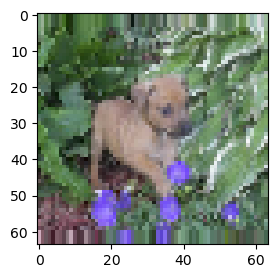

In [78]:
plt.figure(figsize = (3,3))
plt.imshow(images[1])
plt.show()

In [79]:
training_set.class_indices

{'cats': 0, 'dogs': 1}

## Entrenar al modelo

In [23]:
8048 / 32

251.5

In [24]:
2000 / 32

62.5

In [80]:
clasificador.fit(
    training_set, #X_train (Fotos), y_train (cat=0;dog=1)
    steps_per_epoch = 251,
    epochs = 25, # numero de iteraciones
    validation_data = test_set, # le paso X_test e y_test para que no sobreajuste
    validation_steps = 62 
)

C:\Users\ivan_\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
251/251 ━━━━━━━━━━━━━━━━━━━━ 438s 2s/step - accuracy: 0.5109 - loss: 0.7369 - val_accuracy: 0.6240 - val_loss: 0.6357
Epoch 2/25
  1/251 ━━━━━━━━━━━━━━━━━━━━ 28s 112ms/step - accuracy: 0.5938 - loss: 0.6216

C:\Users\ivan_\anaconda3\Lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


251/251 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - accuracy: 0.5938 - loss: 0.6216 - val_accuracy: 0.6507 - val_loss: 0.6244
Epoch 3/25
251/251 ━━━━━━━━━━━━━━━━━━━━ 68s 273ms/step - accuracy: 0.6758 - loss: 0.6093 - val_accuracy: 0.7021 - val_loss: 0.5818
Epoch 4/25
251/251 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - accuracy: 0.5938 - loss: 0.6844 - val_accuracy: 0.6935 - val_loss: 0.5851
Epoch 5/25
251/251 ━━━━━━━━━━━━━━━━━━━━ 58s 233ms/step - accuracy: 0.7096 - loss: 0.5737 - val_accuracy: 0.7288 - val_loss: 0.5548
Epoch 6/25
251/251 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.7188 - loss: 0.5554 - val_accuracy: 0.7193 - val_loss: 0.5593
Epoch 7/25
251/251 ━━━━━━━━━━━━━━━━━━━━ 58s 233ms/step - accuracy: 0.7158 - loss: 0.5486 - val_accuracy: 0.7193 - val_loss: 0.5442
Epoch 8/25
251/251 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.7500 - loss: 0.5471 - val_accuracy: 0.7233 - val_loss: 0.5333
Epoch 9/25
251/251 ━━━━━━━━━━━━━━━━━━━━ 60s 238ms/step - accuracy: 0.7378 - loss: 0.5231 - val_accurac

## Validación de modelo

In [81]:
from tensorflow.keras.preprocessing import image

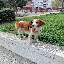

In [125]:
test_image = image.load_img("perro.jpg", target_size = (64,64))
test_image

In [126]:
test_image = image.img_to_array(test_image)

In [127]:
test_image.shape

(64, 64, 3)

In [128]:
test_image = np.expand_dims(test_image, axis=0)
test_image.shape

(1, 64, 64, 3)

In [129]:
test_image = test_image / 255

In [133]:
resultado = clasificador.predict(test_image)
resultado

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


array([[0.98752475]], dtype=float32)

In [131]:
training_set.class_indices

{'cats': 0, 'dogs': 1}

In [132]:
if resultado[0][0] > 0.5:
    print("Esto es un perro")
else:
    print("Esto es un gato")

Esto es un perro
